In [47]:
# Load Dataset 
import pandas as pd
from google.colab import files
uploaded = files.upload()
ds = pd.read_csv("Book1.csv")
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

Saving Book1.csv to Book1.csv


In [49]:
ds.describe()

,Height,Weight
count,1421.000000,1421.000000
mean,165.705278,63.429134
std,25.947786,24.990437
min,121.920000,28.000000
25%,142.240000,40.000000
50%,165.100000,62.600000
75%,187.960000,84.800000
max,208.000000,104.800000


In [50]:
#Check for missing value
ds.isnull().sum()

Height    0
Weight    0
dtype: int64

In [51]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [52]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#  Predict values for test data
lin_pred = lin_reg.predict(X_test)
print(y_test)
print(lin_pred)

[ 92.5  28.2  97.5  28.1 104.8  52.6  57.6  89.8  92.5  47.6  28.2  37.6
 102.5  28.4  52.6  72.6 104.8 104.8  62.6  28.5  89.8  59.9  28.4  28.
  77.5  87.5  47.6  35.2  79.8  74.8  74.8  40.   97.5  28.4  69.8  35.2
  28.4  52.6  28.4  79.8  28.2  62.6  28.4  42.6  28.1  44.9  52.6  79.8
  59.9  44.9 104.8  28.5  87.5  72.6  97.5  64.8  62.6  67.6  28.1  35.2
  54.9  28.   59.9  54.9  92.5  69.8  28.3  67.6  97.5  84.8  94.8  72.6
 102.5  52.6  37.6  28.4  57.6  79.8  28.5  37.6  44.9  35.2  97.5  97.5
  64.8  79.8  54.9  89.8  79.8  62.6  28.5  28.3  84.8  97.5  92.5  37.6
  28.   42.6  79.8 102.5  67.6  82.5  35.2  82.5  35.2 102.5  28.   74.8
  52.6  69.8  28.3  89.8  59.9  35.2  67.6  77.5  42.6  35.2  52.6  72.6
  28.1  28.3  52.6  89.8  44.9  47.6  44.9  79.8  28.3  28.1  67.6 104.8
  52.6  44.9  44.9  87.5  40.   84.8  97.5  47.6  62.6  57.6  67.6  28.2
  64.8  42.6  28.2  47.6 104.8  47.6  67.6  57.6 102.5  99.8  49.9  28.
  28.4  64.8  54.9  64.8  62.6  79.8  47.6  69.8  77.

In [54]:
from sklearn import metrics
print('R square = ',metrics.r2_score(y_test, lin_pred))
print('Mean squared Error = ',metrics.mean_squared_error(y_test, lin_pred))

R square =  0.9946154943516919
Mean squared Error =  3.3005725446843437


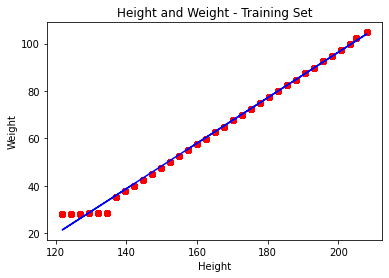

In [55]:
# Visualize Training set
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, lin_reg.predict(X_train), color="blue" )
plt.title("Height and Weight - Training Set")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

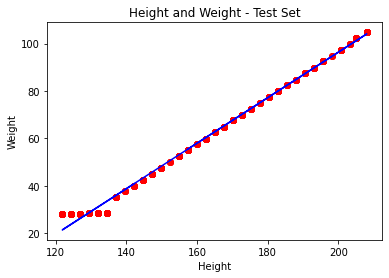

In [56]:
# Visualize Test set
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, lin_reg.predict(X_train), color="blue" )
plt.title("Height and Weight - Test Set")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [57]:
pip install nltk

In [ ]:
pip install newspaper3k

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 194kB 8.7MB/s 
     |████████████████████████████████| 7.4MB 8.0MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13539 sha256=e85648e0c8f03ee0b69736e84e9df45058814512940e5932fd92c888b71c9906
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=01e51bd0cd9d16cd8b7b7e71ea9efebd37932b1bf3e0a004eae9b5935d1b89cf
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=d7c3a38da8155b72e45f192bb65843bb64e881f4f0e29ff9a475e1d383cffdea
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb4

In [58]:
# Import the libraries
from newspaper import Article
import random
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Download the punkt package
nltk.download('punkt', quiet = True )

True

In [67]:
#Get the article
article = Article('https://en.wikipedia.org/wiki/Body_mass_index')
article.download()
article.parse()
article.nlp()
corpus = article.text

In [68]:
#Tokenization
text = corpus 
sentence_list = nltk.sent_tokenize(text) # A list of sentences

In [69]:
#Print list of sentences
print(sentence_list)

["Measure of relative weight based on an individual's mass and height\n\nBody mass index (BMI) A graph of body mass index as a function of body mass and body height.", 'The dashed lines represent subdivisions within a major class.', 'Synonyms Quetelet index MeSH MedlinePlus LOINC 39156-5\n\nBody mass index (BMI) is a value derived from the mass (weight) and height of a person.', 'The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.', 'The BMI may be determined using a table[note 1] or chart which displays BMI as a function of mass and height using contour lines or colours for different BMI categories, and which may use other units of measurement (converted to metric units for the calculation).', '[note 2]\n\nThe BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle

In [70]:
# A fnction to return a random greeting response to a user's greeting
def greeting_response(text):
  text  = text.lower()

  #Bots greeting  response
  bot_greeting = ['howdy', 'hello', 'hey', 'hi', 'hola']
  #User's greeting response
  user_greeting = ['howdy', 'hello', 'hey', 'hi', 'hola','greetings', 'wassup']

  for word in text.split():
    if word in user_greeting: 
      return random.choice(bot_greeting)

In [71]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  return list_index

In [72]:
#Create a bot response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1],cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0: 
      bot_response = bot_response+' '+sentence_list[index[i]]
      response_flag = 1
      j = j+1
    if j > 2:
     break

  if response_flag == 0:
    bot_response = bot_response+'  '+"I apologize I dont understand."
  sentence_list.remove(user_input)
  return bot_response

In [73]:
# BMI
def prediction(g):
    # g = float(input("DocBot: Hi I'm DocBot. Please enter your height : ") )
    lin_pred_new = lin_reg.predict([[g]])
    s = (g * g) / 10000
    print('DocBot: The predicted weight is ', lin_pred_new)
    bmi = (lin_pred_new / s)
    print('DocBot: The predicted Body mass index is is ', bmi)


# start the chat
print('DocBot : I am a Doc Bot. I will answer your queries if you have any. If you want to exit type bye')

exit_list = ['exit', 'see you later', 'bye', 'quit', 'break']

while (True):

    user_input = input()
    s1 = 0
    try:
        val = int(user_input)
        s1 = 0

    except ValueError:
        try:
            val = float(user_input)
            s1 = 0
        except ValueError:
            s1 = 1
            val = s1

    if user_input.lower() in exit_list:
        print('DocBot : Chat with you later !')
        break
    else:
        if greeting_response(user_input) != None:
            print('DocBot: ' + greeting_response(user_input))

        else:
            if s1 == 0:
                prediction(val)
            else:
                print('DocBot: ' + bot_response(user_input))

DocBot : I am a Doc Bot. I will answer your queries if you have any. If you want to exit type bye
154
DocBot: The predicted weight is  [52.18601957]
DocBot: The predicted Body mass index is is  [22.00456214]
what is  bmi
DocBot:  BMI Prime is useful clinically because it shows by what ratio (e.g. In 1998 a NIH report concluded that a BMI over 25 is overweight and a BMI over 30 is obese. BMI is used differently for children.
exit
DocBot : Chat with you later !
